In [1]:
# Import libraries

import numpy as np # linear algebra
import pandas as pd # data processing (i.e. pd.read_csv)
import seaborn as sns # visualizations
import matplotlib.pyplot as plt # visualizations

%matplotlib inline

In [2]:
# Import data

df = pd.read_excel("datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.xlsx")

In [3]:
# Snapshot of data; 5 entries & columns
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


    From this snapshot, we observe that "customerID" won't help us in creating a churn model, so we delete the
    column.

In [4]:
# Drop "customerID"
df.drop(labels=['customerID'], axis=1, inplace=True)

In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
# Missing Values
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Fill "TotalCharges" empty entries with mean of values

total_charges_mean = df['TotalCharges'].mean() # Mean
df['TotalCharges'].fillna(total_charges_mean, inplace=True) # Fillna with Mean

In [8]:
# Keep original dataset
data = df.copy()

#### Feature Extraction

    Observing that most of our features contain non-numerical values, we will encode them; meaning that they will
    be converted from non-numerical to numerical.

In [9]:
# Import LabelEncoder for Encoding
from sklearn.preprocessing import LabelEncoder

# LabelEncoder Function
def label_encoder(data_frame, labels):
    """
        | data_frame: DataFrame contains labels to encode
        | labels: Labels found within the argument DataFrame
    """

    # Initialize LabelEncoder method
    le = LabelEncoder()
    
    for label in labels:
        le.fit(data_frame[label]) # Fit data to LabelEncode
        output = le.transform(data_frame[label]) # Transform the fitted data
        data_frame[label] = pd.Series(data=output) # Re-assign the transfored data to the DataFrame

In [10]:
# List of label names to Encode
encode_label = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', \
          'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', \
          'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Calling label_encoder
label_encoder(data, encode_label)

In [11]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


    Feature Extraction ~ Correlation

In [12]:
corr = data.corr() # Pairwise correlation between features

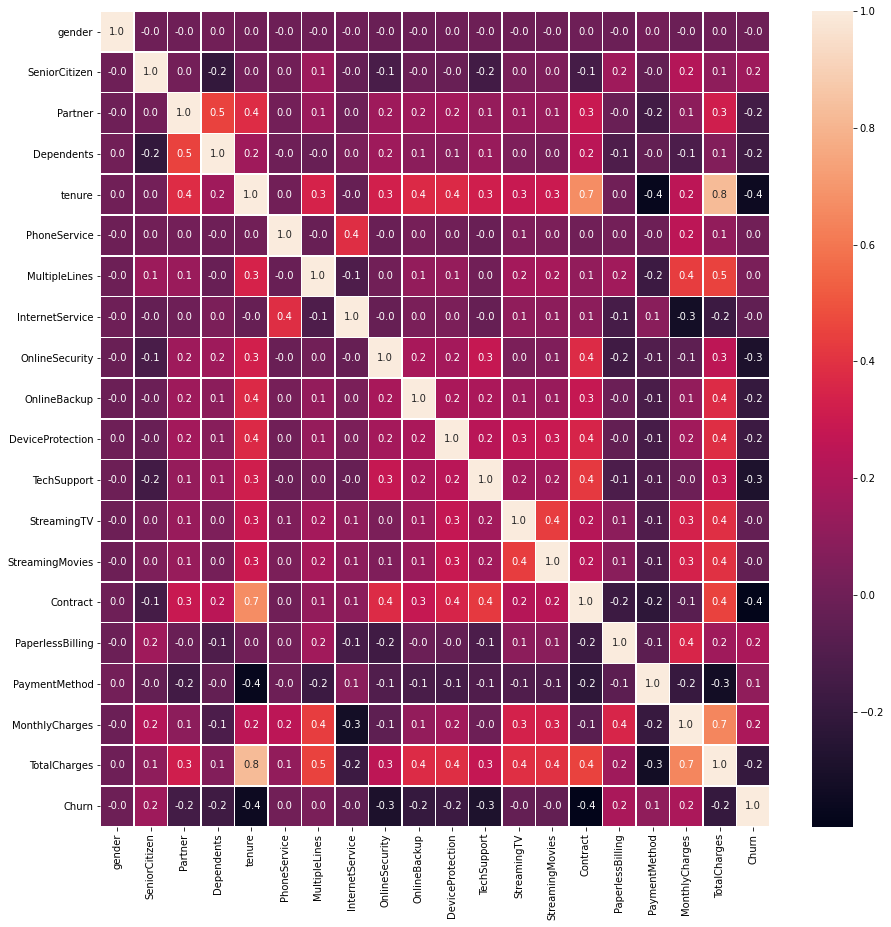

In [13]:
fig, ax = plt.subplots(figsize=(15,15)) # fig & axes objects to control visualizations

sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f', ax=ax) # HeatMap to visualize pairwise correlation

Text(0, 0.5, 'Correlation Value')

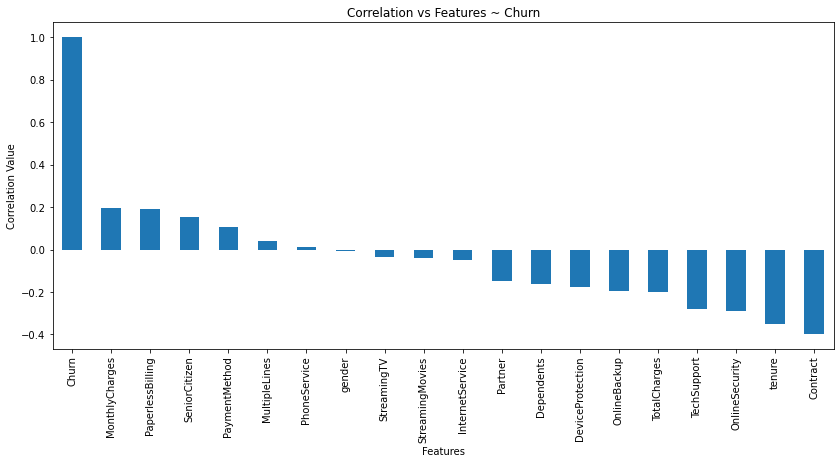

In [14]:
fig, ax = plt.subplots(figsize=(14,6)) # fig & axes objects to control visualizations

corr['Churn'].sort_values(ascending=False).plot(kind='bar') # Bar~plot
ax.set_title("Correlation vs Features ~ Churn")
ax.set_xlabel("Features")
ax.set_ylabel("Correlation Value")

    Note:
    
    * Correlation coefficient ranges between 1.0 and -1.0. 
        - (1.0 shows a perfect positive correlation)
        - (0.0 means no linear relation exists)
        - (-1.0 shows a perfect negative correlation)
        
    * Based on the strength of the correlation, we will pick features with an absolute
      correlation value greater than 1.0.
    
      Hence, these features would be all except "MultipleLines, PhoneService, gender, StreamningTV,
      StreamingMovies, and InternetService".

In [15]:
# Features
features = list()

for feature_name, corr_coeff_ in zip(corr['Churn'].index, corr['Churn'].values):
    
    if feature_name == "Churn":
        pass
    elif abs(corr_coeff_) > 0.1:
        features.append(feature_name)
    pass

print("Selected Features:", features)

Selected Features: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


#### XGBOOST MODEL

    Selected Features

In [16]:
X = data[features] # Feature
y = data.iloc[:, -1] # Label

    XGBOOST MODEL

In [17]:
import xgboost as xgb # import xgboost model

from sklearn.model_selection import train_test_split # split the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate XGBOOST Classifier
gb_model = xgb.XGBClassifier(objective="binary:logistic")

# Classifier Fitting
gb_model.fit(X_train.values, y_train.values)

# Prediction
preds = gb_model.predict(X_test.values)

    Model Evaluation
    
        * The following are some of the metrics we will use the evaluate the accuracy of our model:
          - Confusion Matrix
          - Accuracy
          - ROC AUC value

In [18]:
# Model Accuracy

accuracy = (np.sum(preds == y_test) / y_test.shape[0]) # Correctly predicted / all outcomes
print("Accuracy: {}".format(accuracy))

Accuracy: 0.7934705464868701


In [19]:
# AUC Score

from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, preds)
print("AUC Score: {}".format(auc_score))

AUC Score: 0.705141708157794


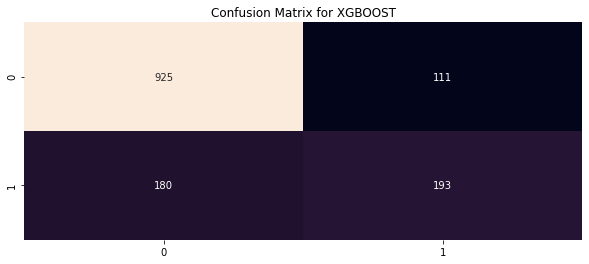

In [20]:
from sklearn.metrics import confusion_matrix # confusion matrix

cm = confusion_matrix(y_test, preds)

# DataFrame contain confusion matrix
df_cm = pd.DataFrame(data=cm)

fig, ax = plt.subplots(figsize=(10,4))

ax.set_title("Confusion Matrix for XGBOOST")
ax.set_xlabel("True Classes")
ax.set_ylabel("Predicted Classes")
heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=ax)

    Saving and loading the Model

In [21]:
import pickle

In [28]:
filename = "xgb_model.pkl"

pickle.dump(gb_model, open(filename, 'wb')) # save model

In [24]:
# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test.values, y_test.values)
print(result)

0.7934705464868701


In [32]:
import joblib

joblib.dump(gb_model, "model.pkl")

['model.pkl']

In [ ]:
# import joblib


# class ChurnPredictionModel:

#     def __init__(self):
#         self.model_ = joblib.load("model.pkl")
#         self.prediction = None

#     def predicted_value(self):
#         return self.prediction
        
#     def predict(self, features):

#         prediction = self.model_.predict(features)

#         self.prediction = prediction

#         return self.prediction

In [33]:
%%writefile app.py
import streamlit as st
import numpy as np
import pickle
import joblib
filename = "xgb_model.sav"
# import model as model


def encode(zipped_arr):
    """
    :param zipped_arr: an array with feature name and value
    :return: a list of encoded values
    """

    encoded_values =list()

    binary_features = ["Senior Citizen", "Partner", "Dependents", "Paperless Billing"]
    ternary_features = ["Online Security", "Online Backup", "Device Protection", "Tech Support"]

    for feature, value in zipped_arr:

        if feature in binary_features:
            if value == "No":
                encoded_values.append(0)
            else:
                encoded_values.append(1)

        elif feature in ternary_features:
            if value == "No":
                encoded_values.append(0)
            elif value == "Yes":
                encoded_values.append(2)
            else:
                encoded_values.append(1)

        elif feature == "Contract":
            if value == "Month-to-Month":
                encoded_values.append(0)
            elif value == "One year":
                encoded_values.append(1)
            else:
                encoded_values.append(2)

        elif feature == "Payment Method":
            if value == "Electronic Check":
                encoded_values.append(2)
            elif value == "Mailed Check":
                encoded_values.append(3)
            elif value == "Bank Transfer":
                encoded_values.append(0)
            else:
                encoded_values.append(1)

        else:
            encoded_values.append(value)

    return encoded_values


def main():

    title \
        = """ 
        <div style="padding:10px; text-align:center">
            <h1> CUSTOMER CHURN MODEL </h1>    
        </div> """

    message \
        = """
        <div style="padding:10px; text-align:center">
            <h3>Kindly fill-in the following information to predict whether a customer will churn or not.</h3>
        </div>
        """

    st.markdown(title, unsafe_allow_html=True)
    st.markdown(message, unsafe_allow_html=True)

    citizen = st.selectbox("Senior Citizen", options=["Yes", "No"])
    partner = st.selectbox("Partner", options=["Yes", "No"])
    dependents = st.selectbox("Dependents", options=["Yes", "No"])
    security = st.selectbox("Online Security", options=["Yes", "No", "No Internet Service"])
    backup = st.selectbox("Online Backup", options=["Yes", "No", "No Internet Service"])
    device_protection = st.selectbox("Device Protection", options=["Yes", "No", "No Internet Service"])
    tech_support = st.selectbox("Tech Support", options=["Yes", "No", "No Internet Service"])
    contract = st.selectbox("Contract", options=["Month-to-Month", "One year", "Two year"])
    paperless_billing = st.selectbox("Paperless Billing", options=["Yes", "No"])
    payment_method = st.selectbox("Payment Method", options=["Electronic Check", "Mailed Check", "Bank Transfer", "Credit Card"])
    tenure = st.number_input("Tenure", key=1, value=0)
    monthly_charges = st.number_input("Monthly Charges", key=2, value=0.0)
    total_charges = st.number_input("Total Charges", key=3, value=0.0)

    btn = st.button("Predict")

    # Click button
    if btn:

        features = ["Tech Support", "Payment Method", "Partner", "Total Charges", "Monthly Charges",
                    "Dependents", "Tenure", "Device Protection", "Online Backup", "Paperless Billing",
                    "Contract", "Senior Citizen", "Online Security"]

        values = [tech_support, payment_method, partner, total_charges, monthly_charges, dependents,
                  tenure, device_protection, backup, paperless_billing, contract, citizen, security]

        encoded_values = [encode(zip(features, values))]
        
        loaded_model = joblib.load("model.pkl")
        
        prediction = loaded_model.predict(np.array(encoded_values))[0]
        
        
        if prediction == 0:
            st.subheader("Customer will not churn")
        else:
            st.subheader("Customer will churn")
        

        # MODEL
#         classifier = ChurnPredictionModel()

#         print(classifier.model_)

        # prediction = classifier.predict(encoded_values)
        #
        # print(prediction)

        print(encoded_values)
        
        


if __name__ == '__main__':
    main()


Overwriting app.py


In [ ]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.79:8501



In [ ]:
# values = [[2, 2, 1, 30.0, 24.0, 1, 1, 2, 2, 1, 0, 1, 2]]

In [ ]:
# gb_model.predict(np.array(values))[0]